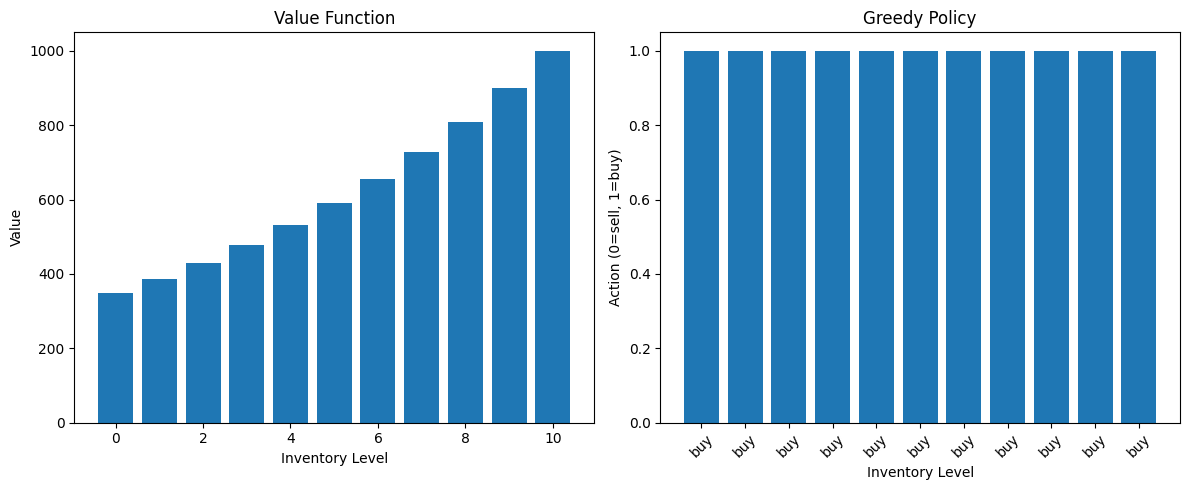

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Inventory Environment Parameters
max_stock = 10  # Max inventory level
actions = ['sell', 'buy']  # Action 0 = sell, Action 1 = buy
gamma = 0.9  # Discount factor

# Reward function
def reward(state, action):
    if action == 'sell' and state > 0:
        return 1
    elif action == 'buy' and state < max_stock:
        return 0
    elif action == 'buy' and state == max_stock:
        return 100  # Bonus for reaching full stock
    else:
        return 0

# Transition function
def transition(state, action):
    if action == 'sell' and state > 0:
        return state - 1
    elif action == 'buy' and state < max_stock:
        return state + 1
    else:
        return state

# Value Iteration algorithm
def value_iteration(threshold=0.01):
    V = np.zeros(max_stock + 1)
    policy = np.zeros(max_stock + 1, dtype=int)

    while True:
        delta = 0
        for s in range(max_stock + 1):
            values = []
            for a in range(len(actions)):
                s_ = transition(s, actions[a])
                r = reward(s, actions[a])
                values.append(r + gamma * V[s_])
            max_value = max(values)
            delta = max(delta, abs(max_value - V[s]))
            V[s] = max_value
            policy[s] = np.argmax(values)
        if delta < threshold:
            break
    return V, policy

# Run value iteration
V, policy = value_iteration()

# --- Plotting ---
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 5))

# Value function plot
ax1.bar(range(max_stock + 1), V)
ax1.set_title("Value Function")
ax1.set_xlabel("Inventory Level")
ax1.set_ylabel("Value")

# Policy plot
policy_labels = [actions[a] for a in policy]
ax2.bar(range(max_stock + 1), policy)
ax2.set_xticks(range(max_stock + 1))
ax2.set_xticklabels(policy_labels, rotation=45)
ax2.set_title("Greedy Policy")
ax2.set_xlabel("Inventory Level")
ax2.set_ylabel("Action (0=sell, 1=buy)")

plt.tight_layout()
plt.show()